# 6.2 Exploring Relationships

In [3]:
# Install data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 1. Importing data sets

In [2]:
path = r'C:\Users\julia\anaconda3\Mental Health Service Ability vs Suicides'

In [4]:
df_mh = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mental Health Service Ability.csv'), index_col = False)

In [5]:
df_s = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Suicide rates.csv'), index_col = False)

In [6]:
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'mh_s_combined.pkl'))

## 2. Cleaning the data

In [10]:
df_mh.head()

,Id,Title Code,Title,Country,Year,Value,Data Collection Date
0,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z
1,20738933,MH_6,Psychiatrists working in mental health sector ...,ALB,2016,1.471,2019-04-25T15:31:58Z
2,20738949,MH_6,Psychiatrists working in mental health sector ...,AGO,2016,0.057,2019-04-25T15:31:59Z
3,20738958,MH_6,Psychiatrists working in mental health sector ...,ATG,2016,1.001,2019-04-25T15:31:59Z
4,20738963,MH_6,Psychiatrists working in mental health sector ...,ARG,2016,21.705,2019-04-25T15:31:59Z


In [19]:
df_mh.dtypes

Id                        int64
Title Code               object
Title                    object
Country                  object
Year                      int64
Value                   float64
Data Collection Date     object
dtype: object

In [20]:
df_mh['order_id'] = df_mh['Value'].astype('int64')

In [31]:
df_merge.head(1)

,Id,Title Code,Title,Country,Year_x,Value_x,Data Collection Date_x,Title Code Suicide,Suicide rates,Location,Year_y,Gender,Value_y,Data Collection Date_y,_merge
0,20738925,MH_6,Psychiatrists working in mental health sector ...,AFG,2016,0.231,2019-04-25T15:31:58Z,MH_12,Age-standardized suicide rates (per 100 000 po...,Afghanistan,2019,Female,5.67,2021-02-08T23:00:00.000Z,both


In [35]:
# Create a new data set without non-numerical values
df_corr = df_merge.drop(columns=['Id', 'Title Code', 'Title', 'Country', 'Data Collection Date_x', 'Title Code Suicide', 'Suicide rates', 'Location', 'Gender', 'Data Collection Date_y', '_merge'])

In [37]:
# Renaming columns to better understand them in correlation
df_corr.rename(columns = {'Year_x' : 'Year of MH Services', 'Value_x' : 'Count of MH Services', 'Year_y' : 'Year of Suicide', 'Value_y' : 'Count of Suicides',}, inplace = True)

## 3. Exploring Relationships

In [39]:
# Create a correlation matrix using pandas
df_corr.corr()

,Year of MH Services,Count of MH Services,Year of Suicide,Count of Suicides
Year of MH Services,1.000000e+00,-2.078199e-01,-4.154135e-15,0.045296
Count of MH Services,-2.078199e-01,1.000000e+00,-3.581928e-14,0.020194
Year of Suicide,-4.154135e-15,-3.581928e-14,1.000000e+00,-0.094204
Count of Suicides,4.529559e-02,2.019395e-02,-9.420429e-02,1.000000


## Heat map

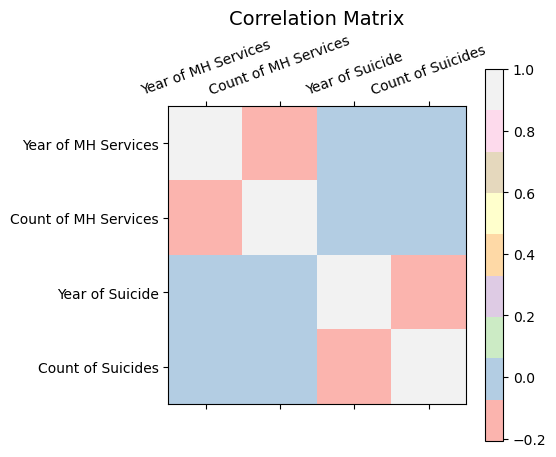

In [66]:
# Creating a heat map
plt.matshow(df_corr.corr(), cmap='Pastel1') 
plt.colorbar() 
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10, rotation=20)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

Weak negative correlation between year and count of MH services: There's a slight decrease in the number of mental health services over the years.

Very weak positive correlation between count of MH services and count of suicides: There's a slight increase in suicide rates with an increase in mental health service counts. Simply increasing the availability of mental health services may not necessarily lead to a decrease in suicide rates, highlighting the complexity of addressing mental health issues accordingly.

Weak negative correlation between year and count of suicides: There's a slight decrease in suicide rates over the years.

## Scatterplot

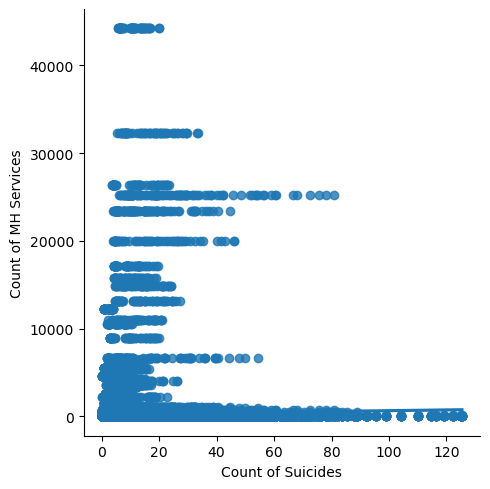

In [77]:
# Create a scatterplot for the suicide rates vs. MH services
sns.lmplot(x = 'Count of Suicides', y = 'Count of MH Services', data = df_corr)

The scatterplot points are scattered around the regression line (which is not noticeable due to the weak correlation), indicating a weak relationship between the count of suicides and the count of mental health services.
The weak correlation suggests limited predictive power. Other factors not captured in the data may have a stronger influence on suicide rates.

## Pair Plots

C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

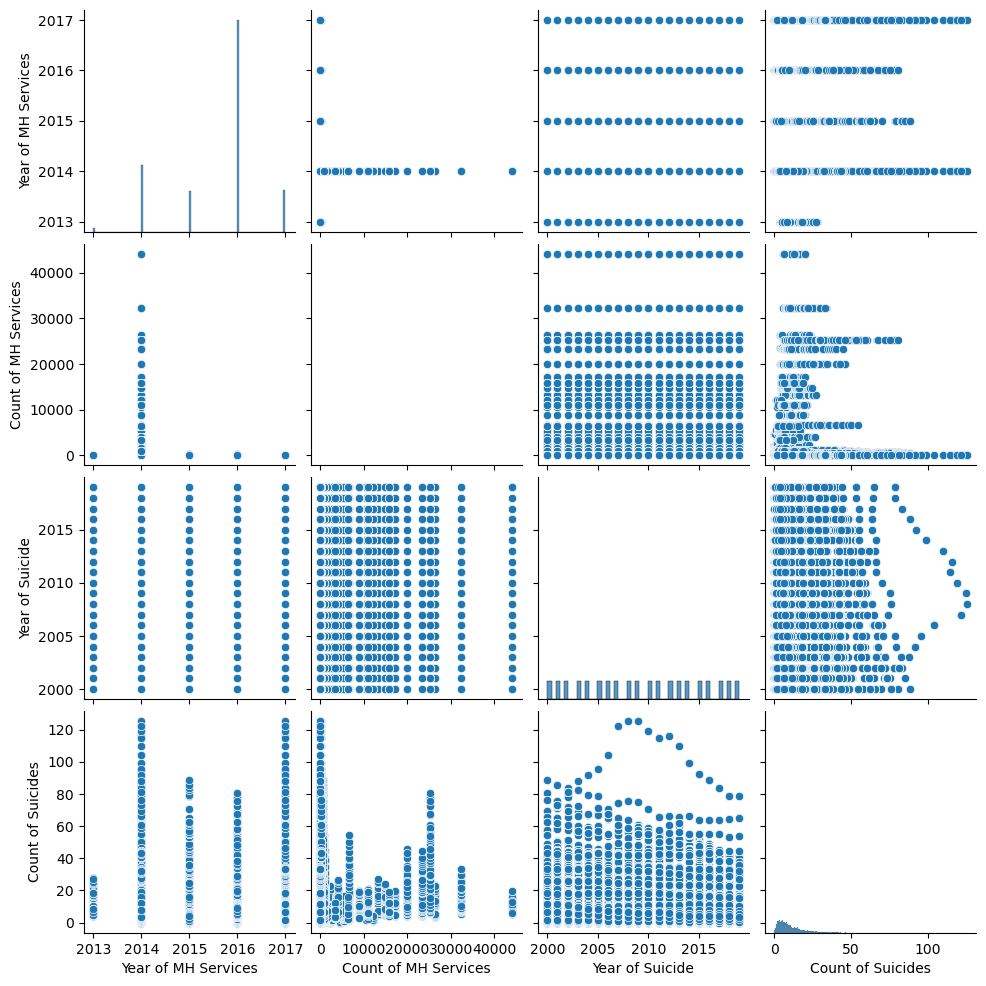

In [78]:
g = sns.pairplot(df_corr)

I would like to further explore the distribution of gender and country/location.

## Categorical plot

C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count of Suicides', ylabel='Count'>

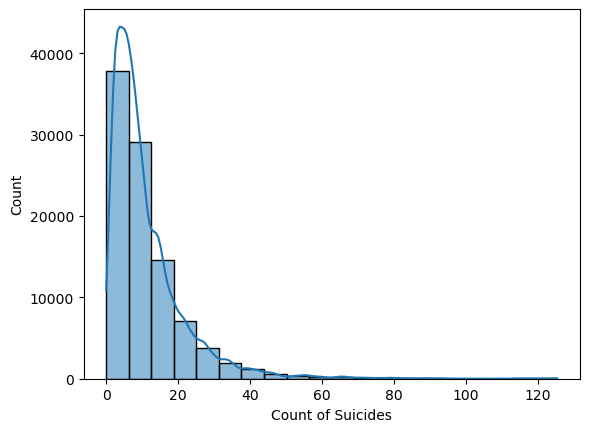

In [79]:
sns.histplot(df_corr['Count of Suicides'], bins = 20, kde = True)

The histogram is right-skewed and shows a clear pattern of decreasing frequency as the counts of suicides increase. 

## 4. Answering questions

Is there a correlation between the Mental Health Service Abilities and Suicides? Are there less suicides, the more service ability there is?
-> There is a very weak positive correlation between count of MH services and count of suicides. There's a slight increase in suicide rates with an increase in mental health service counts. Simply increasing the availability of mental health services may not necessarily lead to a decrease in suicide rates, highlighting the complexity of addressing mental health issues accordingly.

Are there temporal patterns or seasonal variations in suicide rates?
-> We only have data over the years, unfortunately not months, so we can't really see a clear pattern or seasonal variations.

## 5. Hypothesis

There is a correlation between duicide rate and gender. Males are more prone to suicide than females.

## 6. Note

This project is going into another direction as I intended it to go. I wanted to analyze a correlation between lack of mental health support and suicide rates, but apparently there is only a slight correlation between these variables.